# Large Language Models Section

**section description.......**

In [1]:
pip install openai==0.28

Note: you may need to restart the kernel to use updated packages.


In [12]:
import pandas as pd
import numpy as np
from modules import SECRETS
from modules.openAI import OpenAI
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score
import matplotlib.pyplot as plt

## Open AI ChatGPT

In [2]:
gpt = OpenAI(SECRETS.OPENAI_API_KEY)
df = pd.read_csv("data/full_text.csv")

In [3]:
df_sampled, _ = train_test_split(df, train_size=0.05, random_state=123)

<Axes: title={'center': 'sampled df'}, ylabel='count'>

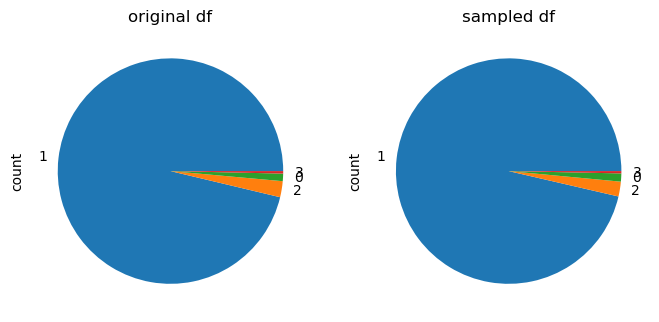

In [4]:
fig, ax = plt.subplots(ncols = 2, figsize=(8,4))

df['label_ids'].value_counts().plot(kind='pie', ax=ax[0], title="original df")
df_sampled['label_ids'].value_counts().plot(kind='pie', ax=ax[1], title="sampled df")

**The distribution of the labels are the same. So the sampled df can represent the reality correctly**

In [6]:
label_counts = df_sampled['label_ids'].value_counts()
label_counts

label_ids
1    8500
2     187
0     103
3      29
Name: count, dtype: int64

In [7]:
def safe_classify(text):
    try:
        return gpt.classify_openai(text)
    except Exception as e:
        print(f"Error classifying text: {text}. Error: {e}")
        return "Error"

df_sampled['classification'] = df_sampled['text'].apply(safe_classify)

In [9]:
#checking labels returned from chatGPT, there are some reply exclusions
label_counts = df_sampled['classification'].value_counts()
label_counts

classification
3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         4081
0                                                                                                                                                                                                                                                                                                                                                         

In [10]:
#setting function for cleaning dataset from reply exclusions
def clean_classification(value):
    valid_classifications = {'0', '1', '2', '3'}  # Set of valid classification values
    if value.strip() in valid_classifications:
        return value.strip()
    else:
        return 'Invalid'

# Apply this function to the dataset
df_sampled['classification'] = df_sampled['classification'].apply(clean_classification)

In [14]:
df_sampled['label_ids'] = df_sampled['label_ids'].astype(str)
df_sampled['classification'] = df_sampled['classification'].astype(str)
# Calculating accuracy
accuracy = accuracy_score(df_sampled['label_ids'], df_sampled['classification'])
print(f"Accuracy: {accuracy}")

Accuracy: 0.024832747477038213


In [15]:
# Calculating precision, recall, and F1-score
precision, recall, f1, _ = score(df_sampled['label_ids'], df_sampled['classification'], average='weighted')
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Precision: 0.8096847672390789
Recall: 0.024832747477038213
F1 Score: 0.031171182914909643


C:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [16]:
# Generating confusion matrix
conf_matrix = confusion_matrix(df_sampled['label_ids'], df_sampled['classification'], labels=['0', '1', '2', '3'])
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[  10   20   38   32]
 [3362  130  872 3918]
 [  12    4   58  110]
 [   0    1    7   21]]
